<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Food_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

#Loading the data

In [4]:
food_consumption =  pd.read_csv('/content/food_consumption.csv')

#Exploratory Data Analysis

In [ ]:
food_consumption.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [ ]:
food_consumption.tail()

,country,food_category,consumption,co2_emmission
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27
1429,Bangladesh,Nuts inc. Peanut Butter,0.72,1.27


In [ ]:
food_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [ ]:
food_consumption.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [ ]:
food_consumption.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

#Data Cleaning

In [ ]:
#sum of missing values
food_consumption.isnull().sum()

,0
country,0
food_category,0
consumption,0
co2_emmission,0


# FOOD CARBON FOOTPRINT Data Analysis

The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.

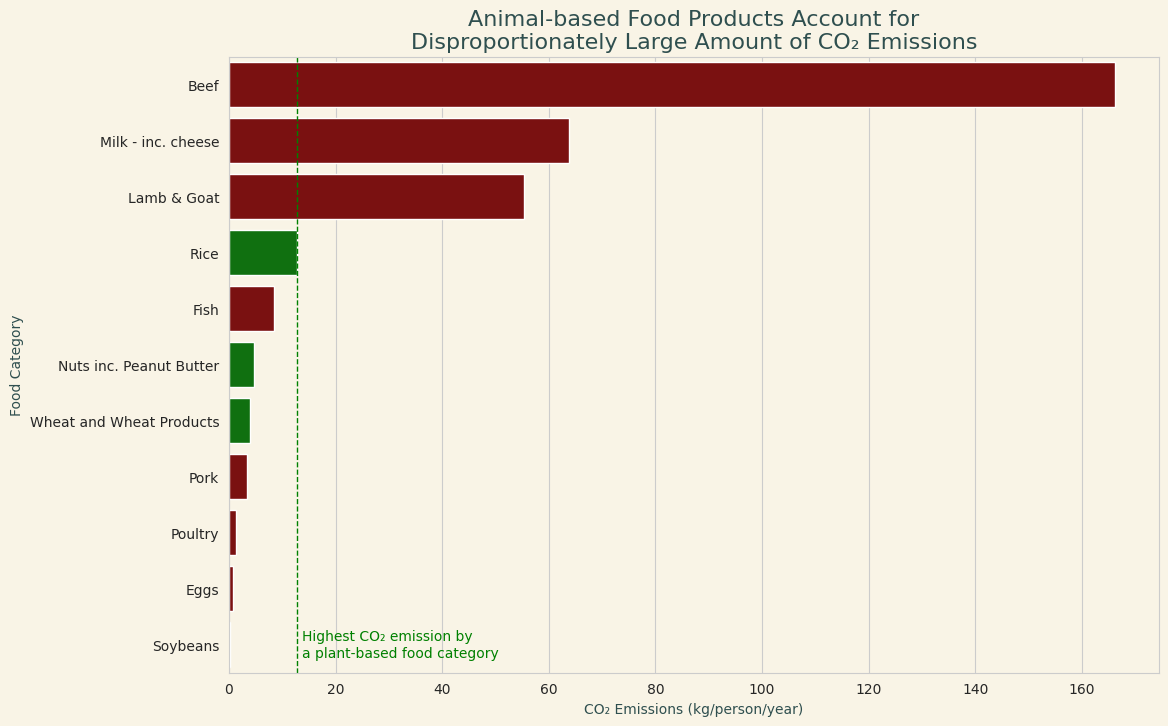

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Rename column for consistency if needed
food_consumption.rename(columns={'co2_emmission': 'co2_emission'}, inplace=True)

# Filter data for the five East African countries
east_african_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']
df_east_africa = food_consumption[food_consumption['country'].isin(east_african_countries)]

# Calculate the average CO₂ emission per person by food category
avg_co2_emission = df_east_africa.groupby('food_category')['co2_emission'].mean().reset_index()

# List of animal-based food categories
animal_based = ['Beef', 'Milk - inc. cheese', 'Lamb & Goat', 'Pork', 'Fish', 'Poultry', 'Eggs']

# Categorize food items as 'Animal' or 'Plant'-based
avg_co2_emission['type'] = avg_co2_emission['food_category'].apply(lambda x: 'Animal' if x in animal_based else 'Plant')

# Sort the data by CO₂ emission in descending order
avg_co2_emission = avg_co2_emission.sort_values(by='co2_emission', ascending=False)

# Set colors based on category type and convert to a list
colors = avg_co2_emission['type'].map({'Animal': 'darkred', 'Plant': 'green'}).tolist()

# Plot setup
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=avg_co2_emission, x='co2_emission', y='food_category', palette=colors)

# Set the background color to match the reference image
plt.gca().set_facecolor("#f9f4e6")  # Use a similar beige background color
plt.gcf().set_facecolor("#f9f4e6")

# Add title and subtitle
plt.title("Animal-based Food Products Account for\nDisproportionately Large Amount of CO₂ Emissions", fontsize=16, color='#2f4f4f')
# plt.suptitle("(As measured by average CO₂ emissions)", fontsize=10, y=0.92, color='gray')

# Label axes
plt.xlabel("CO₂ Emissions (kg/person/year)", color='#2f4f4f')
plt.ylabel("Food Category", color='#2f4f4f')

# Highlight the highest plant-based CO₂ emission with a dashed line and annotation
max_plant_emission = avg_co2_emission[avg_co2_emission['type'] == 'Plant']['co2_emission'].max()
plt.axvline(max_plant_emission, color='green', linestyle='--', linewidth=1)
plt.text(max_plant_emission + 1, len(avg_co2_emission) - 1, "Highest CO₂ emission by\na plant-based food category", color="green", va='center')

# Function to add icons
# def add_icon(ax, y, type_icon):
#     icon_path = 'path_to_animal_icon.png' if type_icon == 'Animal' else 'path_to_plant_icon.png'
#     img = plt.imread(icon_path)
#     imagebox = OffsetImage(img, zoom=0.08)  # Adjust the zoom level for icon size
#     ab = AnnotationBbox(imagebox, (0, y), frameon=False, box_alignment=(0, 0.5))
#     ax.add_artist(ab)

# Add icons next to each bar
# for i, (index, row) in enumerate(avg_co2_emission.iterrows()):
#     add_icon(plt.gca(), i, row['type'])

# Display plot
plt.show()

In [5]:
#list all foods
food_consumption['food_category'].unique()

array(['Pork', 'Poultry', 'Beef', 'Lamb & Goat', 'Fish', 'Eggs',
       'Milk - inc. cheese', 'Wheat and Wheat Products', 'Rice',
       'Soybeans', 'Nuts inc. Peanut Butter'], dtype=object)

In [20]:
import pandas as pd
import plotly.graph_objects as go

# Assuming `food_consumption` dataset is loaded with columns 'country', 'food_category', 'consumption', 'co2_emission'
# Filter for East African countries and Beef category only
east_african_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']
df_east_africa = food_consumption[food_consumption['country'].isin(east_african_countries)]
df_beef = df_east_africa[df_east_africa['food_category'] == 'Beef']

# Convert 'consumption' and 'co2_emission' columns to numeric, setting errors='coerce' to handle non-numeric values
df_beef['consumption'] = pd.to_numeric(df_beef['consumption'], errors='coerce')
df_beef['co2_emission'] = pd.to_numeric(df_beef['co2_emission'], errors='coerce')

# Calculate average values per country for Beef, ignoring NaN values
avg_beef_values = df_beef.groupby('country', as_index=False)[['consumption', 'co2_emission']].mean()

# Sort by 'consumption' (you can change to 'co2_emission' if needed)
avg_beef_values = avg_beef_values.sort_values(by='consumption', ascending=False)

# Create the interactive bar chart
fig = go.Figure()

# Add Beef consumption bar
fig.add_trace(go.Bar(
    x=avg_beef_values['country'],
    y=avg_beef_values['consumption'],
    name='Beef Consumption',
    marker_color='green'
))

# Add Beef CO₂ emissions bar
fig.add_trace(go.Bar(
    x=avg_beef_values['country'],
    y=avg_beef_values['co2_emission'],
    name='Beef CO₂ Emissions',
    marker_color='darkred',
    opacity=0.6
))

# Update layout to match the aesthetic style
fig.update_layout(
    title_text="Consumption and CO₂ Emissions for Beef in East African Countries",
    title_font_size=16,
    xaxis_title="Country",
    yaxis_title="Average (kg/person/year)",
    barmode='group',  # Grouped bars to compare each metric side-by-side
    plot_bgcolor="#f9f4e6",  # Beige background
    paper_bgcolor="#f9f4e6",  # Beige background for outer frame
    showlegend=True
)

# Remove gridlines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Display the plot
fig.show()

In [21]:
food_consumption.columns

Index(['country', 'food_category', 'consumption', 'co2_emission'], dtype='object')

In [33]:
import pandas as pd
import plotly.express as px

# Group the data by food_category and country, and calculate the average CO2 emissions
df_grouped = food_consumption.groupby(['food_category', 'country'])['co2_emission'].mean().reset_index()

# Create a horizontal box plot
fig = px.box(df_grouped,
             x='co2_emission',
             y='food_category',
             color='food_category',
             title="CO₂ Emissions by Food Category (with Outlier Countries)",
             labels={'co2_emission': 'CO₂ Emissions (kg CO₂/person/year)', 'food_category': 'Food Category'},
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show outliers (countries outside the whiskers)
fig.update_traces(boxmean='sd', jitter=0.3)

# Show the plot
fig.update_layout(
    xaxis_title="CO₂ Emissions (kg CO₂/person/year)",
    yaxis_title="Food Category",
    showlegend=False
)

fig.show()
